In [1]:
import torch
from transformers import BertweetTokenizer, RobertaForSequenceClassification
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
device = torch.device("cuda")
tokenizer = BertweetTokenizer.from_pretrained('E:\\research\\experiments\\n-p\\bertweet\\min_len\\bertweet_50_all\\output\\', num_labels=50)
model = RobertaForSequenceClassification.from_pretrained('E:\\research\\experiments\\n-p\\bertweet\\min_len\\bertweet_50_all\\output\\')
model.cuda()

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(64001, 768, padding_idx=1)
      (position_embeddings): Embedding(130, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
             

In [30]:
with open("E:\\research\\experiments\\n-p\\attention\\auszug\\35_auszug.txt", 'r', encoding='utf-8') as f:
    comments = f.readlines()

In [31]:
inputs = tokenizer(comments, max_length=128, padding=True, truncation=True, return_tensors='pt').to(device)
with torch.no_grad():
    outputs = model(**inputs)
    
logits = outputs.logits.cpu()
last_hidden_states = outputs.hidden_states[-1].cpu()

embeddings = last_hidden_states[:, 0, :].numpy()
pca = PCA(50)
pca_embeddings = pca.fit_transform(embeddings)

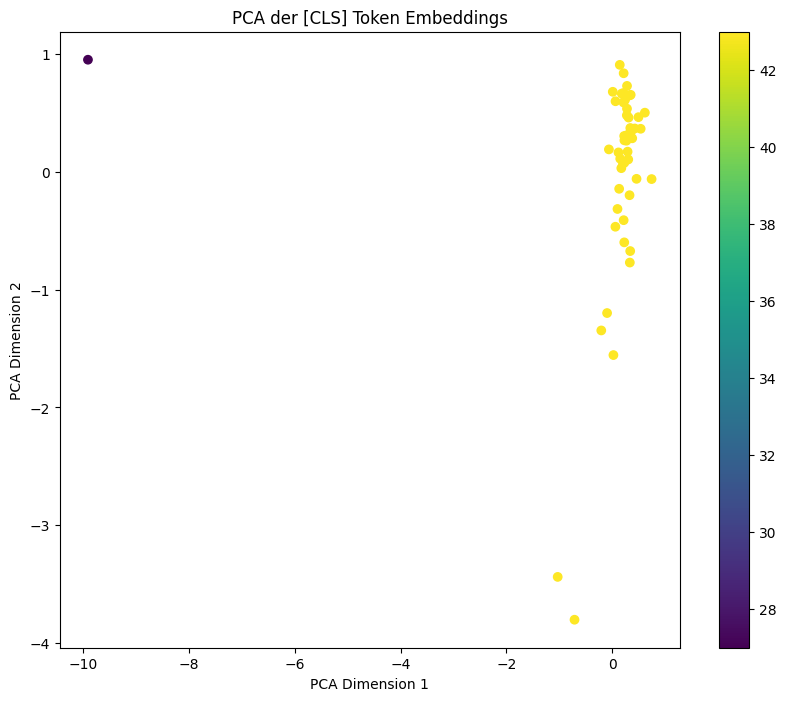

In [32]:
plt.figure(figsize=(10, 8))
plt.scatter(pca_embeddings[:, 0], pca_embeddings[:, 1], c=torch.argmax(logits, dim=1).numpy(), cmap='viridis')
plt.colorbar()
plt.title("PCA der [CLS] Token Embeddings")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.show()